In [1]:
# Neccesary Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show
import altair as alt
from ggplot import *
import holoviews as hv
import folium

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv
/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv


#### Mergin the two 'csv' files

- Note: I've got these two files '/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv', '/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv'

- I'm going to merge the two csv files because each file are related

In [2]:
import pandas as pd

# Specify the file paths for the CSV files
categories_file_path = "/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv"
products_file_path = "/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv"

# Read the CSV files into DataFrames
categories_df = pd.read_csv(categories_file_path)
products_df = pd.read_csv(products_file_path)

# Merge the two DataFrames on a common key if there is one
# For example, if there is a common 'product_id' column:
# data = pd.merge(products_df, categories_df, on='product_id')
# Replace 'product_id' with the actual key column name you want to use for merging

# If there's no common key, you can concatenate them:
data = pd.concat([products_df, categories_df], axis=1)

# Now, 'data' contains the merged DataFrame with both datasets


### Initial Data Exploration

In [3]:
# Display the first few rows of the dataframe
print("First 10 rows")
data.head(10)

First 10 rows


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,1.0,Beading & Jewelry Making
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,2.0,Fabric Decorating
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,3.0,Knitting & Crochet Supplies
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,4.0,Printmaking Supplies
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,5.0,Scrapbooking & Stamping Supplies
5,B07XSCD2R4,Maxlite 5 Softside Expandable Luggage with 4 S...,https://m.media-amazon.com/images/I/61LnBNsSBS...,https://www.amazon.com/dp/B07XSCD2R4,4.5,0,144.49,0.00,104,False,500,6.0,Sewing Products
6,B07MXF4G8K,"Hard Shell Carry on Luggage Airline Approved, ...",https://m.media-amazon.com/images/I/71CghLYrnA...,https://www.amazon.com/dp/B07MXF4G8K,4.5,0,169.99,0.00,104,False,400,7.0,Craft & Hobby Fabric
7,B07H515VCZ,"Maxporter II 30"" Hardside Spinner Trunk Luggag...",https://m.media-amazon.com/images/I/81f3h+YHOX...,https://www.amazon.com/dp/B07H515VCZ,4.5,0,299.99,0.00,104,False,100,8.0,Needlework Supplies
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,https://m.media-amazon.com/images/I/91eOWP4myS...,https://www.amazon.com/dp/B08BXBCNMQ,4.5,0,112.63,137.04,104,False,500,9.0,"Arts, Crafts & Sewing Storage"
9,B0B9K44XTS,Luggage Sets Expandable Lightweight Suitcases ...,https://m.media-amazon.com/images/I/81dsv5GrCL...,https://www.amazon.com/dp/B0B9K44XTS,4.4,0,209.99,0.00,104,False,200,10.0,"Painting, Drawing & Art Supplies"


In [4]:
# Get the shape of the data
shape = data.shape

# Printing the shape
print("Shape of the DataFrame: Rows={}, Columns={}".format(shape[0], shape[1]))

Shape of the DataFrame: Rows=1426337, Columns=13


In [5]:
# Numerical Statistical Analysis
data.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth,id
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,248.000000
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02,133.875000
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02,77.132441
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00,67.500000
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00,137.500000
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01,199.250000
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05,270.000000


In [6]:
## Get the information
print("Info of the data")
data.info()

Info of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  id                 248 non-null      float64
 12  category_name      248 non-null      object 
dtypes: bool(1), float64(4), int64(3), object(5)
memory usage: 131.9+ MB


In [7]:
#Unique values in each column
unique_values = data.nunique()
unique_values

asin                 1426337
title                1385430
imgUrl               1372162
productURL           1426337
stars                     41
reviews                11861
price                  29961
listPrice              14518
category_id              248
isBestSeller               2
boughtInLastMonth         30
id                       248
category_name            248
dtype: int64

In [8]:
# Get the percentage of non unique values
# Step 1: Calculate the total number of rows
total_rows = len(data)

# Step 2: Calculate the number of rows with unique values for all columns
unique_rows = len(data.drop_duplicates())

# Step 3: Calculate the number of rows with at least one duplicate value in any column
non_unique_rows = total_rows - unique_rows

# Step 4: Calculate the percentage of non-unique rows
percentage_non_unique = (non_unique_rows / total_rows) * 100

# Print the percentage of non-unique values
print("Percentage of Non-Unique Values: {:.2f}%".format(percentage_non_unique))


Percentage of Non-Unique Values: 0.00%


In [9]:
# Get the last few rows of the data
data.tail(10)

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
1426327,B072BY5PF7,Multifunctional Sports Stretchable Seamless Ca...,https://m.media-amazon.com/images/I/71UTVl9vRV...,https://www.amazon.com/dp/B072BY5PF7,4.5,0,16.99,0.00,112,False,0,NaN,NaN
1426328,B0CDP193JG,Manana sera Bonito hat Cotton Soft top Embroid...,https://m.media-amazon.com/images/I/71DHh3FFGZ...,https://www.amazon.com/dp/B0CDP193JG,0.0,0,16.99,0.00,112,False,0,NaN,NaN
1426329,B09KNMWWYF,2 Pairs Butterfly Sunglasses Butterfly Rimless...,https://m.media-amazon.com/images/I/61x0W4iLoR...,https://www.amazon.com/dp/B09KNMWWYF,4.5,0,9.49,10.99,112,False,0,NaN,NaN
1426330,B08YN4J92M,Leather Ratchet Belts for Men Automatic Buckle...,https://m.media-amazon.com/images/I/51uT9XjDgA...,https://www.amazon.com/dp/B08YN4J92M,4.6,0,35.98,0.00,112,False,0,NaN,NaN
1426331,B00BW8URU2,1178 Genuine Leather Mens Slim Key Case Wallet...,https://m.media-amazon.com/images/I/51VARC6euL...,https://www.amazon.com/dp/B00BW8URU2,3.9,0,19.99,22.99,112,False,0,NaN,NaN
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0,NaN,NaN
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0,NaN,NaN
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0,NaN,NaN
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0,NaN,NaN
1426336,B07GH67QC8,in Hoc Signo Vinces Knights Templar Masonic Em...,https://m.media-amazon.com/images/I/91Kt2KQf0E...,https://www.amazon.com/dp/B07GH67QC8,4.9,0,18.79,0.00,112,False,0,NaN,NaN


- Basic Data Overview:

In [10]:
# Get the total number of products
total_products = len(data)
total_products

# Get data types of each column
data_types = data.dtypes
data_types

asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
id                   float64
category_name         object
dtype: object

- Category Analysis:

In [11]:
# Average price and rating by category
avg_price_by_category = data.groupby('category_name')['price'].mean()
avg_price_by_category

category_name
Abrasive & Finishing Products                      149.99
Accessories & Supplies                              22.79
Additive Manufacturing Products                     18.99
Arts & Crafts Supplies                             144.79
Arts, Crafts & Sewing Storage                      112.63
                                                    ...  
Women's Watches                                    297.49
Xbox 360 Games, Consoles & Accessories             165.99
Xbox One Games, Consoles & Accessories             399.00
Xbox Series X & S Consoles, Games & Accessories    179.99
eBook Readers & Accessories                        154.99
Name: price, Length: 248, dtype: float64

In [12]:
# Average price and rating by category
avg_rating_by_category = data.groupby('category_name')['stars'].mean()
avg_rating_by_category

category_name
Abrasive & Finishing Products                      4.4
Accessories & Supplies                             4.0
Additive Manufacturing Products                    4.3
Arts & Crafts Supplies                             4.7
Arts, Crafts & Sewing Storage                      4.5
                                                  ... 
Women's Watches                                    4.7
Xbox 360 Games, Consoles & Accessories             4.4
Xbox One Games, Consoles & Accessories             4.9
Xbox Series X & S Consoles, Games & Accessories    5.0
eBook Readers & Accessories                        4.6
Name: stars, Length: 248, dtype: float64

In [13]:
# Top categories by the number of products
top_categories = data['category_name'].value_counts().head(10)
top_categories

category_name
Beading & Jewelry Making          1
Small Animal Supplies             1
Heating, Cooling & Air Quality    1
Kids' Home Store                  1
Home Storage & Organization       1
Wall Art                          1
Vacuum Cleaners & Floor Care      1
Ironing Products                  1
Party Supplies                    1
Pet Bird Supplies                 1
Name: count, dtype: int64

- Best Selling Products:

In [14]:
# Best-selling products
best_selling_products = data[data['isBestSeller']]
best_selling_products

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
924,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,https://m.media-amazon.com/images/I/513fraGQXW...,https://www.amazon.com/dp/B00W66LQFO,4.6,0,18.48,26.00,110,True,10000,NaN,NaN
925,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,https://www.amazon.com/dp/B0C4RMF5PZ,4.8,0,40.00,0.00,110,True,4000,NaN,NaN
933,B077ZMKWVM,"Men's Crew T-Shirts, Multipack, Style G1100",https://m.media-amazon.com/images/I/61Zf5AAGPW...,https://www.amazon.com/dp/B077ZMKWVM,4.6,0,18.99,0.00,110,True,8000,NaN,NaN
938,B07PH2VWX1,"Men's Coolzone Boxer Briefs, Moisture Wicking ...",https://m.media-amazon.com/images/I/81lHfvvXK0...,https://www.amazon.com/dp/B07PH2VWX1,4.6,0,19.59,24.49,110,True,5000,NaN,NaN
944,B01D2GRTIE,Men's Multi-Pack Mesh Ventilating Comfort Fit ...,https://m.media-amazon.com/images/I/61lxpudqRp...,https://www.amazon.com/dp/B01D2GRTIE,4.6,0,14.99,0.00,110,True,6000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415016,B0007LCLPE,Pyle 2Way Custom Component Speaker System-6.5”...,https://m.media-amazon.com/images/I/812gPYS6xm...,https://www.amazon.com/dp/B0007LCLPE,4.0,0,44.99,47.99,26,True,0,NaN,NaN
1415072,B004S50ZB2,BOSS Audio Systems R1002 Riot Series Car Stere...,https://m.media-amazon.com/images/I/610Vz6PUFl...,https://www.amazon.com/dp/B004S50ZB2,4.1,0,35.41,56.00,26,True,0,NaN,NaN
1416949,B0BZVV2N8N,"Pickleball Paddles, USAPA Approved Fiberglass ...",https://m.media-amazon.com/images/I/71WQNbP6dW...,https://www.amazon.com/dp/B0BZVV2N8N,4.8,0,35.99,0.00,198,True,300,NaN,NaN
1416996,B00HR1NBWE,Skechers Men's Afterburn M. Fit,https://m.media-amazon.com/images/I/81ivYs9jxt...,https://www.amazon.com/dp/B00HR1NBWE,4.4,0,40.00,74.00,198,True,200,NaN,NaN


In [15]:
# Compare the ratings
avg_rating_best_sellers = best_selling_products['stars'].mean()
avg_rating_best_sellers

4.494037558685447

In [16]:
# Compare prices
avg_price_best_sellers = best_selling_products['price'].mean()
avg_price_best_sellers

29.721798122065728

- Price Analysis

- What is the distribution of prices for products?
- Are there any outliers in the price distribution?

In [17]:
# Distribution of prices
price_distribution = data['price'].describe()
price_distribution

count    1.426337e+06
mean     4.337540e+01
std      1.302893e+02
min      0.000000e+00
25%      1.199000e+01
50%      1.995000e+01
75%      3.599000e+01
max      1.973181e+04
Name: price, dtype: float64

- Ratings and Reviews:

- What is the average rating and review count for products?
- Is there a correlation between ratings and reviews?

In [18]:
# Average rating and review count
avg_rating = data['stars'].mean()
avg_review_count = data['reviews'].mean()

In [19]:
# Correlation between ratings and reviews
correlation = data['stars'].corr(data['reviews'])
correlation

0.03710630544799552

### Missing Data Analysis:


- how many missing values are there in the 'id' and 'category_name' columns?
- Should you handle or impute these missing values?

In [20]:
# Number of missing values
missing_id_count = data['id'].isnull().sum()
missing_category_count = data['category_name'].isnull().sum()

In [21]:
# Get the total of Missing values
data.isnull().sum()

asin                       0
title                      1
imgUrl                     0
productURL                 0
stars                      0
reviews                    0
price                      0
listPrice                  0
category_id                0
isBestSeller               0
boughtInLastMonth          0
id                   1426089
category_name        1426089
dtype: int64

In [22]:
# Fill Missing values with '0'
data.fillna(0, inplace=True)

In [23]:
# We've finally got rid of all the Missing values
data.isnull().sum().sum()

0

### Data Visualization

In [24]:

# . Calculate the average price and rating for products in each category
avg_price_by_category = data.groupby('category_name')['price'].mean().reset_index()
avg_price_by_category.columns = ['Category', 'Average Price']

avg_rating_by_category = data.groupby('category_name')['stars'].mean().reset_index()
avg_rating_by_category.columns = ['Category', 'Average Rating']


# . Create an interactive bar chart for average prices
fig2 = px.bar(avg_price_by_category.head(10), x='Average Price', y='Category', orientation='h',
              title='Average Price by Category',
              labels={'Average Price': 'Average Price'})

# . Create an interactive bar chart for average ratings
fig3 = px.bar(avg_rating_by_category.head(10), x='Average Rating', y='Category', orientation='h',
              title='Average Rating by Category',
              labels={'Average Rating': 'Average Rating'})

# 6. Display the interactive charts
fig2.show()
fig3.show()


In [25]:
# Filter the DataFrame to get best-selling products
best_selling_products = data[data['isBestSeller']]

# Create a scatter plot to compare prices and ratings
fig = px.scatter(best_selling_products, x='price', y='stars', color='isBestSeller',
                 title='Comparison of Prices and Ratings for Best-Selling Products',
                 labels={'price': 'Price', 'stars': 'Rating'},
                 hover_data=['title'])

# Customize the chart
fig.update_layout(
    xaxis=dict(title_font=dict(size=14, family='Arial', color='white')),
    yaxis=dict(title_font=dict(size=14, family='Arial', color='white')),
    title_font=dict(size=20, family='Arial', color='white'),
    legend_title_font=dict(size=14, family='Arial', color='white'),
    paper_bgcolor='black',
    font=dict(color='white'),
)

# Display the interactive chart
fig.show()


- Top 10 most Expensive Products

In [26]:
# Sort the data by price in descending order to get the most expensive products
top_10_expensive = data.sort_values(by='price', ascending=False).head(10)

# Create an interactive bar chart to display the top 10 most expensive products
fig = px.bar(top_10_expensive, x='price', y='title',
             orientation='h',
             title='Top 10 Most Expensive Products',
             labels={'price': 'Price', 'title': 'Product'},
             color_discrete_sequence=['#1f77b4'])

# Customize the chart appearance
fig.update_layout(
    xaxis=dict(title_font=dict(size=14, family='Arial', color='white')),
    yaxis=dict(title_font=dict(size=14, family='Arial', color='white')),
    title_font=dict(size=20, family='Arial', color='white'),
    legend_title_font=dict(size=14, family='Arial', color='white'),
    paper_bgcolor='black',
    font=dict(color='white'),
)

# Display the interactive chart
fig.show()


In [27]:
# Find the product with the highest rating
best_product = data[data['stars'] == data['stars'].max()]

# Print the best product information
print("Best Product with Highest Rating:")
print(best_product[['title', 'stars']])


Best Product with Highest Rating:
                                                     title  stars
109      24 Inch Suitcase with Separate Compartment, Wa...    5.0
168      MaXpace 31" Softside UltraLight Checked Spinne...    5.0
209      Luggage Suitcase with Spinner Wheels, Hardside...    5.0
218      Mountain Products Quadro Pro Hardcase, 22, Dee...    5.0
228                                      2023 Terminal Bag    5.0
...                                                    ...    ...
1426270                       Gold Rush Cord Fitted blk/gl    5.0
1426284         sunglasses Garrett (FT0862-S 52E) - lenses    5.0
1426303  Roan Mountain Titanium Belt - Brown | USA-Made...    5.0
1426311                                 Men's Contemporary    5.0
1426321  Windward Original Series | Fishing Sunglasses ...    5.0

[94840 rows x 2 columns]


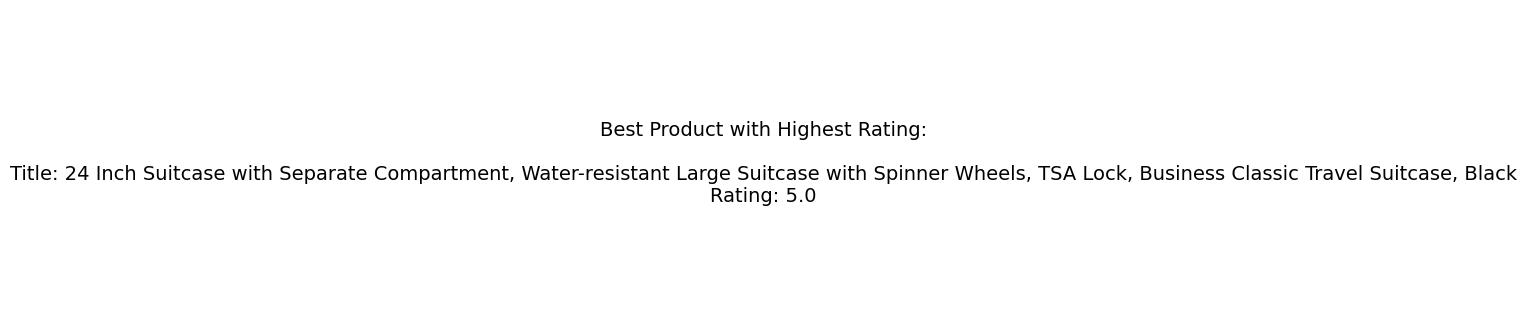

In [28]:
# Find the product with the highest rating
best_product = data[data['stars'] == data['stars'].max()]

# Create a textual visualization
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, f"Best Product with Highest Rating:\n\nTitle: {best_product['title'].values[0]}\nRating: {best_product['stars'].values[0]}", 
         fontsize=14, ha='center', va='center', color='black')
plt.axis('off')
plt.show()


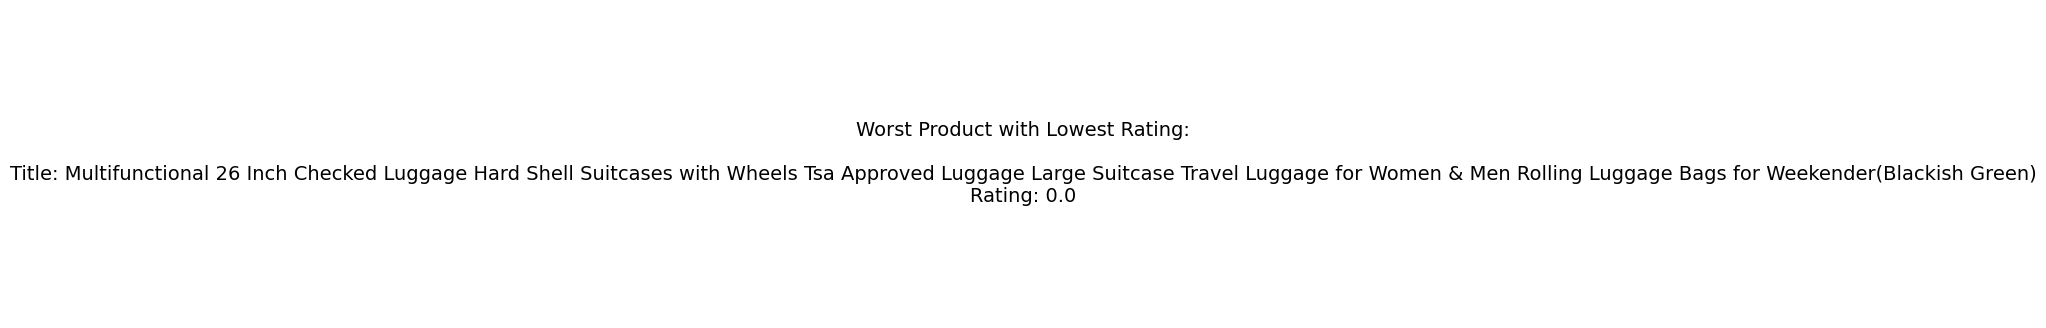

In [29]:
# Find the product with the lowest rating
worst_product = data[data['stars'] == data['stars'].min()]

# Create a textual visualization for the product with the lowest rating
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, f"Worst Product with Lowest Rating:\n\nTitle: {worst_product['title'].values[0]}\nRating: {worst_product['stars'].values[0]}", 
         fontsize=14, ha='center', va='center', color='black')
plt.axis('off')
plt.show()


#### Predicting the best-selling products for the next year!

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have already loaded your data into a DataFrame named 'data'

# Select relevant features (reviews and prices) and target variable (isBestSeller)
X = data[['reviews', 'price']]
y = data['isBestSeller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.99      1.00      1.00    283544
        True       0.33      0.01      0.01      1724

    accuracy                           0.99    285268
   macro avg       0.66      0.50      0.51    285268
weighted avg       0.99      0.99      0.99    285268



In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming you have already loaded your data into a DataFrame named 'data'

# Select relevant features (reviews and prices) and target variable (isBestSeller)
X = data[['reviews', 'price']]
y = data['isBestSeller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Create a DataFrame to map product information to predictions
product_predictions = pd.DataFrame({'Title': X_test.index.map(data['title']),
                                    'IsBestSeller': y_test,
                                    'PredictedIsBestSeller': predictions})

# Filter for products predicted as best sellers (True)
predicted_best_sellers = product_predictions[product_predictions['PredictedIsBestSeller']]

# Display the products predicted as best sellers
print(predicted_best_sellers)


                                                     Title  IsBestSeller  \
1075511  NTBAY 1800 Thread 100% Brushed Microfiber Stan...         False   
60104    Soundcore Anker Life P2 True Wireless Earbuds ...         False   
59892    Turtle Beach Recon 70 Gaming Headset for Ninte...         False   
175772   MAJESTIC PURE Peppermint Essential Oil, Therap...         False   
255346   Hard As Hoof Nail Strengthening Cream with Coc...          True   
255759   MRS. MEYER’S CLEANDAY Hand Soap, Made with Ess...          True   
255553   Beetles 23Pcs Gel Nail Polish Kit with Base Ge...         False   
1056667  Machine Washable Bordered Laundry Room Rug Non...         False   
116791   Ring Video Doorbell Wired – Convenient feature...         False   
1070625  NYX PROFESSIONAL MAKEUP Butter Gloss, Non-Stic...          True   
138044   Nintendo Switch with Neon Blue and Neon Red Jo...         False   
137919   Nintendo Neon Purple/ Neon Orange Joy-Con (L-R...         False   
176117   Cli

- Running this code will provide you with a list of products that the model predicted as best sellers, along with their titles and actual 'isBestSeller' status. You can examine these products to see which specific ones were predicted as best sellers by the model.